# imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import os
import pandas as pd
import math
import mme_eval.multi_eval
import pandas
import numpy as np
import itertools
from matplotlib.pylab import plt

# Analyze dcase 2020 systems

In [2]:

rootFolder='dcase2020'

dataset='public'
gtf=f'{rootFolder}/metadata/{dataset}.tsv'
metaf=f'{rootFolder}/metadata/{dataset}.meta.tsv'
groundtruth=pd.read_csv(gtf,delimiter='\t')

l=['Miyazaki_NU_task4_SED_1','Miyazaki_NU_task4_SED_3','Hao_CQU_task4_SED_4','Koh_NTHU_task4_SED_3','Liu_thinkit_task4_SED_3','Miyazaki_NU_task4_SED_2','Ebbers_UPB_task4_SED_1','Hao_CQU_task4_SED_2','CTK_NU_task4_SED_4','Yao_UESTC_task4_SED_3']
# l=['Ebbers_UPB_task4_SED_1']
total_dic={}
for team in sorted(os.listdir(f'{rootFolder}/submissions/')):
    for code in sorted(os.listdir(f'{rootFolder}/submissions/{team}')):
        if not(code in l):continue
        print(f'    {code}')
        
        base_prediction_path=f'{rootFolder}/submissions/{team}/{code}/{dataset}/'
        pef = f'{base_prediction_path}/{code}.output.tsv'
        if not(os.path.isfile(pef)):
            all=[x for x in os.listdir(base_prediction_path) if '.output.tsv' in x]
            if len(all)>0:
                pef=f'{base_prediction_path}/{all[0]}'
            else:
                print('error not found',pef)
                continue
        try:
            title=code.replace('_task4','')
            res1=mme_eval.multi_eval.get_single_result(gtf,pef,metaf,debug=0)
            total_dic[title]=res1
        except Exception as e:
            print('Error! submission is ignored',e)
#             raise
            
fs={s:{c:total_dic[s][c].loc['macro-avg']['f1'] for c in total_dic[s]} for s in total_dic  }
total=pd.DataFrame(fs).T
total

    CTK_NU_task4_SED_4
    Ebbers_UPB_task4_SED_1
    Hao_CQU_task4_SED_2
    Hao_CQU_task4_SED_4
    Koh_NTHU_task4_SED_3
    Liu_thinkit_task4_SED_3
    Miyazaki_NU_task4_SED_1
    Miyazaki_NU_task4_SED_2
    Miyazaki_NU_task4_SED_3
    Yao_UESTC_task4_SED_3


,collar,segment,psd d/gtc=0.1,psd d/gtc=0.3,psd d/gtc=0.5,psd d/gtc=0.8,psd d/gtc=0.85,psd d/gtc=0.9,detection,detect-mono,monotony,uniformity,total duration,relative duration,boundary onset,boundary offset
CTK_NU_SED_4,0.504686,0.734447,0.739508,0.716928,0.669434,0.559581,0.517729,0.463445,0.742460,0.675633,0.630011,0.935575,0.680940,0.874490,0.903049,0.901298
Ebbers_UPB_SED_1,0.508973,0.778014,0.765865,0.748280,0.714474,0.533983,0.470317,0.405464,0.769607,0.688082,0.627385,0.916364,0.716073,0.847792,0.906158,0.894404
Hao_CQU_SED_2,0.506343,0.711678,0.732883,0.722288,0.696792,0.532276,0.473409,0.411079,0.733464,0.684312,0.622953,0.940537,0.696411,0.871267,0.917285,0.902296
Hao_CQU_SED_4,0.523201,0.701758,0.717141,0.709073,0.689820,0.557636,0.514738,0.456140,0.717943,0.676362,0.628956,0.953646,0.687413,0.906078,0.932241,0.916433
Koh_NTHU_SED_3,0.515043,0.761354,0.743417,0.728392,0.706002,0.580205,0.537492,0.469844,0.743899,0.689416,0.615224,0.923053,0.723627,0.890866,0.923456,0.911290
Liu_thinkit_SED_3,0.511941,0.735136,0.725679,0.716419,0.681250,0.566150,0.524448,0.455780,0.726459,0.677897,0.626754,0.945809,0.700073,0.908391,0.928400,0.906258
Miyazaki_NU_SED_1,0.556713,0.775097,0.774237,0.754398,0.730325,0.591954,0.536406,0.450517,0.776046,0.729395,0.671238,0.943554,0.732932,0.877952,0.933467,0.920208
Miyazaki_NU_SED_2,0.510778,0.764084,0.751012,0.733949,0.706676,0.541507,0.484888,0.404188,0.752869,0.710701,0.647608,0.941757,0.717381,0.856371,0.928592,0.913680
Miyazaki_NU_SED_3,0.551983,0.772585,0.763047,0.747109,0.724789,0.578939,0.523205,0.437524,0.766416,0.722035,0.663496,0.944729,0.728691,0.869855,0.934516,0.922230
Yao_UESTC_SED_3,0.505015,0.774457,0.768551,0.763979,0.738929,0.525940,0.459492,0.386512,0.770647,0.713357,0.617578,0.920842,0.733362,0.892427,0.900445,0.871187


# Visualize Globally by F1

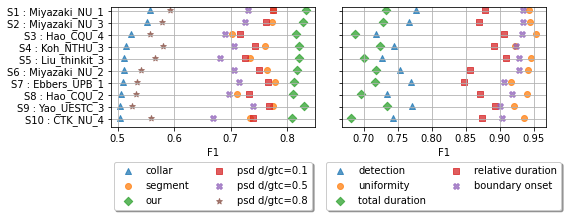

In [3]:
w={'detection':1.,
   'uniformity':1.,
   'total duration':1.,
   'relative duration':1.,
#     'boundary onset':1.
}
wsum=sum(w.values())
total['our']=0
for wi in w:total['our']+=w[wi]/wsum*total[wi]

total=total.sort_values(['collar'])
# total=total[-10:]#displays top 10 systems
fig, axs = plt.subplots(1, 2, figsize=(8, len(total)/3), sharey=True)

ind = np.arange(len(total))
def myplot(ax,colis):
    cols=total.columns[colis]
    width = .9/len(cols)
    marker = itertools.cycle(( '^', 'o', 'D', 's','X', '*'))
    i=0
    ax.grid(True)

    for i,x in enumerate(cols):
        if x=='y':continue
#             ax.plot(total[x],ind+.2 ,label=x,marker=next(marker),alpha=.75)
        ax.scatter(total[x],ind+.2 ,label=x,marker=next(marker),alpha=.75)
#         ax.barh(ind+.4-i*width, total[x], width, label=x)#, color='red'

    ax.set(yticks=ind + width, yticklabels=[f'S{len(total)-i} : {y.replace("_SED","")}' for i,y in enumerate(total.index)], ylim=[-.5, len(total)-.5])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),fancybox=True, shadow=True, ncol=2)
    ax.set_xlabel('F1')


myplot(axs[0],[0,1,len(total.columns)-1,2,4,5])
# myplot(axs[1],[2])
#     myplot(axs[1],range(len(total.columns)-9,len(total.columns)-1))
#     myplot(axs[1],[8,11,12,13])
myplot(axs[1],[8,11,12,13,14])

fig.tight_layout()
plt.show()

# Visualize in details

CTK_NU_SED_4


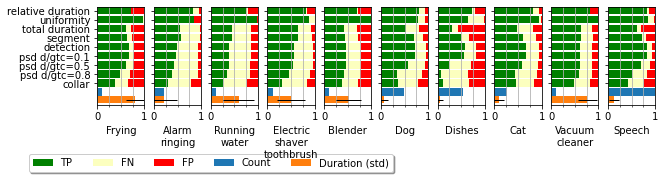

Ebbers_UPB_SED_1


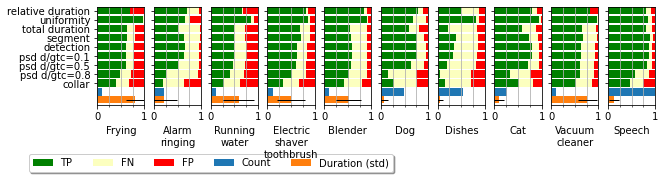

Hao_CQU_SED_2


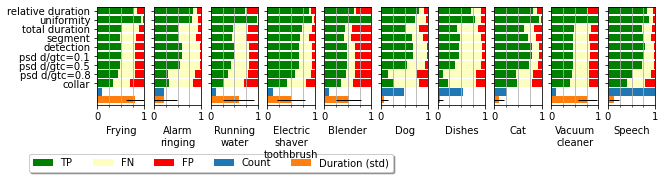

Hao_CQU_SED_4


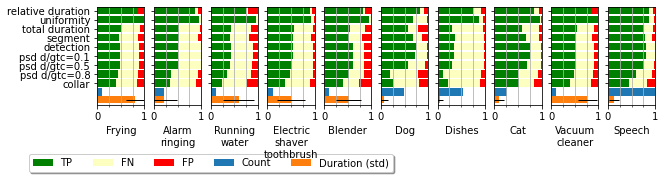

Koh_NTHU_SED_3


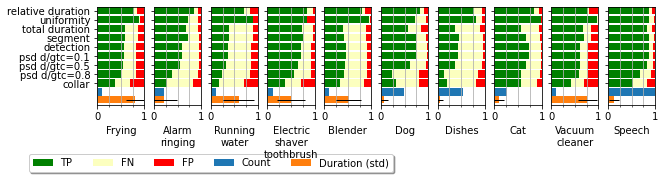

Liu_thinkit_SED_3


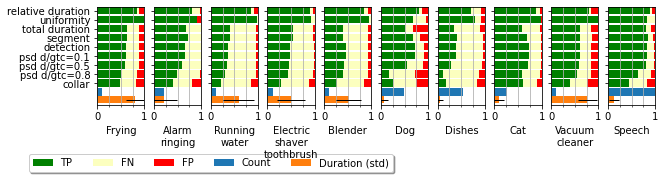

Miyazaki_NU_SED_1


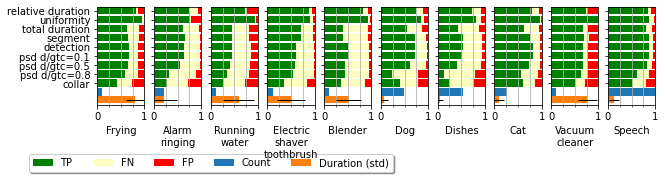

Miyazaki_NU_SED_2


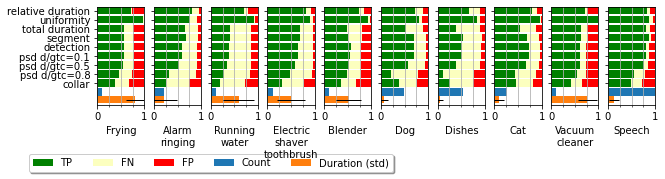

Miyazaki_NU_SED_3


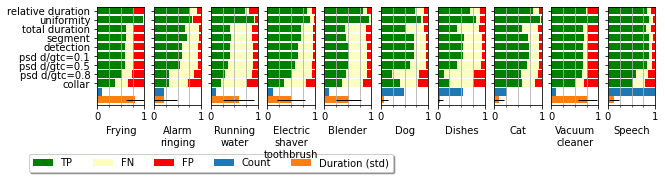

Yao_UESTC_SED_3


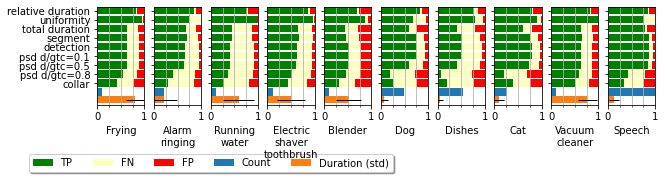

In [4]:
for s in total_dic:
# for s in ['Miyazaki_NU_SED_1','CTK_NU_SED_4','Hao_CQU_SED_4']:
    print(s)
#     metrics=[m for m in total_dic[s]]
    metrics=['collar','psd d/gtc=0.8','psd d/gtc=0.5','psd d/gtc=0.1','detection','segment','total duration','uniformity','relative duration']
    metric_team={m:total_dic[s][m] for m in metrics }

#     metrics=list(team.keys())
    clas=[c for c in metric_team[metrics[0]].index[:-2]]
#     clas=['Dishes',  'Cat', 'Speech', 'Blender','Alarm_bell_ringing']

    team={c:pd.DataFrame({m: metric_team[m].loc[c] for m in metrics}).T for c in clas}
    
    removerows=['micro-avg','macro-avg']#,'Alarm_bell_ringing','Blender']
    
#     total=total[-10:]
    fig, axs = plt.subplots(1, len(clas), figsize=(len(clas), len(team[clas[0]])/5), sharey=True)
    

    gt = pd.read_csv(gtf, sep="\t")
    gt['duration']=gt.offset-gt.onset
    info=gt.groupby('event_label')['duration'].agg(['mean','std','count'])
    info=info.loc[clas]
    maxd=(info['mean']+info['std']).max().max();
    gt['duration']=maxd
    info_n=info/maxd

    avg_e_dur=pd.Series({c:team[c].loc['total duration'][['Ntp','Nfn']].sum()/team[c].loc['detection'][['Ntp','Nfn']].sum() for c in clas})
    avg_e_dur=pd.Series({c:team[c].loc['total duration'][['Ntp','Nfn']].sum()/team[c].loc['detection'][['Ntp','Nfn']].sum() for c in clas})
    e_count=pd.Series({c:team[c].loc['detection'][['Ntp','Nfn']].sum() for c in clas})
    

    avg_e_dur=avg_e_dur/avg_e_dur.max()
    e_count=e_count/e_count.max()
    
    ind = np.arange(len(team[clas[0]]))
    def myplot(ax,num,c):
        
        team_m=team[c][['Ntp','Nfn','Nfp']]#.iloc[[0,6,8,2,1,12,10,11,9,13,14,15]]
        
#         team_m=team_m.sort_index()
        ind = np.arange(len(team_m))
        cols=team_m
        team_m=(team_m.T/team_m.sum(axis=1)).T
        width = .8
        marker = itertools.cycle(( '^', 'o', 'D', 's','X', '*'))
        i=0

        ax.barh(ind+.8, team_m['Ntp'], width, label='TP',color='g')#, color='red'
        ax.barh(ind+.8, team_m['Nfn'], width,left=team_m['Ntp'], label='FN',color='#f6ff00',alpha=.25)#, color='red'
        ax.barh(ind+.8, team_m['Nfp'], width,left=team_m[['Ntp','Nfn']].sum(axis=1), label='FP',color='r',alpha=1)#, color='red'
        
        
        ax.barh(-.2,e_count[c],width,label='Count')
#         ax.barh(-1,avg_e_dur[c],width,label='Duration(avg)')
        ax.barh(-1,info_n.loc[c]['mean'],width,label='Duration (std)')
        ax.errorbar( info_n.loc[c]['mean'],-1.1, xerr=info_n.loc[c]['std'],color='black',elinewidth=1, fmt='-.')
        all_data=gt['duration'][gt['event_label']==c]
        
        ax.set(yticks=ind + width, yticklabels=[f'{y}' for i,y in enumerate(team_m.index)], ylim=[0.4-2, len(team_m)+.2],xlim=[0,1])
        if num==2:
            ax.legend(loc='upper center', bbox_to_anchor=(0, -0.45),fancybox=True, shadow=True, ncol=5)
        ax.set_xlabel(c.replace(' ','\n').replace('bell_','').replace('_','\n'))
        

#         ax.set_xticks(np.arange(0, 1, .5))
        ax.set_xticks(np.arange(0, 1, .25), minor=True)

        ax.grid(True,axis='x',which='both')

    for i,c in enumerate(clas):
        
        myplot(axs[i],i,c)
#     myplot(axs[1],range(len(total.columns)-8,len(total.columns)-1))
    
    # print(total)
    plt.show()

